<!--- Licensed to the Apache Software Foundation (ASF) under one -->
<!--- or more contributor license agreements.  See the NOTICE file -->
<!--- distributed with this work for additional information -->
<!--- regarding copyright ownership.  The ASF licenses this file -->
<!--- to you under the Apache License, Version 2.0 (the -->
<!--- "License"); you may not use this file except in compliance -->
<!--- with the License.  You may obtain a copy of the License at -->

<!---   http://www.apache.org/licenses/LICENSE-2.0 -->

<!--- Unless required by applicable law or agreed to in writing, -->
<!--- software distributed under the License is distributed on an -->
<!--- "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY -->
<!--- KIND, either express or implied.  See the License for the -->
<!--- specific language governing permissions and limitations -->
<!--- under the License. -->

# Differences between NP on MXNet and NumPy

This topic lists known differences between `mxnet.np` and `numpy`. With this quick reference, NumPy users can more easily adopt  the MXNet NumPy-like API.

In [1]:
import numpy as onp  # o means original
from mxnet import np, npx
npx.set_np()  # Configue MXNet to be NumPy-like

## Missing operators

Many, but not all, operators in NumPy are supported in MXNet. You can find the missing operators in [NP on MXNet reference](../../../api/np/index.rst). They're displayed in gray blocks instead of having links to their documents.

In addition, an operator might not contain all arguments available in NumPy. For example, MXNet does not support stride. Check the operator document for more details.

## Extra functionalities

The `mxnet.np` module aims to mimic NumPy.  Most extra functionalities that enhance NumPy for deep learning use are available on other modules, such as `npx` for operators used in deep learning and `autograd` for automatic differentiation. The `np` module API is not complete. One notable change is GPU support. Creating routines accepts a `ctx` argument:

In [2]:
gpu = npx.gpu() if npx.num_gpus() > 0 else npx.cpu()
a = np.array(1, ctx=gpu)
b = np.random.uniform(ctx=gpu)
(a, b.context)

[22:09:36] /work/mxnet/src/storage/storage.cc:202: Using Pooled (Naive) StorageManager for GPU


(array(1., ctx=gpu(0)), gpu(0))

Methods to move data across devices.

In [3]:
a.copyto(npx.cpu()), b.as_in_context(npx.cpu())

[22:09:38] /work/mxnet/src/storage/storage.cc:202: Using Pooled (Naive) StorageManager for CPU


(array(1.), array(0.74021935))

## Default data types

NumPy uses 64-bit floating numbers or 64-bit integers by default.

In [4]:
onp.array([1,2]).dtype, onp.array([1.2,2.3]).dtype

(dtype('int64'), dtype('float64'))

MXNet uses 32-bit floating points as the default date type. It's the default data type for deep learning.

In [5]:
np.array([1,2]).dtype, np.array([1.2,2.3]).dtype

(dtype('float32'), dtype('float32'))

## Scalars

NumPy has classes for scalars, whose base class is 'numpy.generic'. The return values of selecting an element and reduce operators are scalars.

In [6]:
a = onp.array([1,2])
type(a[0]), type(a.sum())

(numpy.int64, numpy.int64)

A scalar is almost identical to a 0-rank tensor (TODO, there may be subtle difference), but it has a different class. You can check the data type with `isinstance`

In [7]:
b = a[0]
(b.ndim, b.size, isinstance(b, onp.generic), isinstance(b, onp.integer),
 isinstance(b, onp.int64), isinstance(b, onp.ndarray))

(0, 1, True, True, True, False)

MXNet returns 0-rank `ndarray` for scalars. (TODO, may consider to add scalar classes later.)

In [8]:
a = np.array([1,2])
type(a[0]), type(a.sum())

(mxnet.numpy.ndarray, mxnet.numpy.ndarray)

In [9]:
b = a[0]
b.ndim, b.size, isinstance(b, np.ndarray)

(0, 1, True)

## Save and load

Users can use the `npx.save`, `npx.savez` and `npx.load` methods respectively to
save and load arrays. `npx.save` saves single, dense arrays to the `.npy`
format, whereas `npx.savez` can save a collection of both dense and sparse
arrays to the `.npz` format.

In [10]:
a = np.array(1, ctx=gpu)
npx.save('a', a)
npx.load('a')
npx.savez('a', a=a, b=a*2)
npx.load('a')

{'a': array(1.), 'b': array(2.)}

## Matplotlib

Sometimes the MXNet ndarray cannot used by other libraries that accept NumPy input, for example matplotlib. The best practice is converting to NumPy with `asnumpy()`.

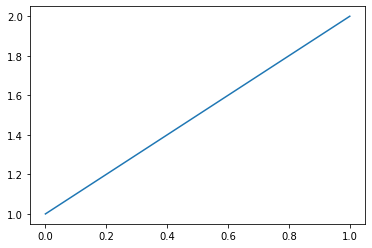

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.array([1,2]).asnumpy());